<a href="https://colab.research.google.com/github/e-lavanya-4/Intrusion-detection-using-Machine-Learning-models/blob/main/Internshipproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [ ]:
data=pd.read_csv('/content/IDD.csv')
#data=pd.read_csv('')

In [ ]:
data.head()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Packets Looked Up,Packets Matched,Binary Label
0,1,132,9181,6311853,238,46,0,0,280,2,5,767,688,1
1,2,187,6304498,15713,171,46,146,5908166,5969,84,5,767,688,1
2,3,235,6311567,8030,58,46,2,278,280,2,5,767,688,1
3,4,59,7878,16439,182,46,2,278,280,2,5,767,688,1
4,1,188,6304547,16497,183,46,0,0,280,2,5,489,403,1


In [ ]:
data[data["Binary Label"]==0]

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Packets Looked Up,Packets Matched,Binary Label
24138,1,239,16570,29762239,407950,767,65,4567,5252378,135,5,641039,640921,0
24139,2,188,6304558,17163303,407718,767,0,0,560,4,5,641039,640921,0
24140,3,173034,19893106,11918797,282852,767,133,5252096,560,4,5,641039,640921,0
24141,4,348664,14678238,15182621,210660,767,2,278,5127,69,5,641039,640921,0
24142,1,190,6304713,10299579,244416,765,0,0,322,3,5,641252,641136,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27906,2,3362,69437146,99442203,415951,1657,0,0,556,4,5,992868,992744,0
27907,3,120695,55561897,76437063,318134,1657,2,278,556,4,5,992868,992744,0
27908,4,305111,25506841,100234870,284579,1657,2,278,556,4,5,992868,992744,0
27909,1,180362,51774040,12689179,299967,1660,127,4989537,556,4,5,957064,956932,0


In [ ]:
data.isnull().sum()

Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Packets Looked Up                0
Packets Matched                  0
Binary Label                     0
dtype: int64

In [ ]:
data["Delta Lost Packets"]=data["Delta Sent Packets"] - data["Delta Received Packets"] #less correlation
data["Lost Packets"]=data["Sent Packets"] - data["Received Packets"]

data["Delta Lost Bytes"]=data["Delta Sent Bytes"] - data["Delta Received Bytes"] 
data["Lost Bytes"]=data["Sent Bytes"] - data["Received Bytes"]

In [ ]:
#data = data.dropna('columns')# drop columns with NaN (not needed)
  
data = data[[col for col in data if data[col].nunique() > 1]]# keep columns where there are more than 1 unique values
  


In [ ]:
print(data.corr()["Binary Label"].sort_values(ascending=False))

Binary Label                     1.000000
Delta Port alive Duration (S)    0.101091
Delta Received Packets           0.054783
Delta Sent Packets               0.052226
Delta Received Bytes             0.002918
Delta Sent Bytes                 0.001930
Delta Lost Bytes                -0.000744
Delta Lost Packets              -0.005937
Port Number                     -0.025401
Lost Bytes                      -0.058019
Port alive Duration (S)         -0.331775
Received Bytes                  -0.394573
Sent Bytes                      -0.473247
Lost Packets                    -0.508276
Received Packets                -0.680680
Sent Packets                    -0.919435
Packets Matched                 -0.940549
Packets Looked Up               -0.940549
Name: Binary Label, dtype: float64


In [ ]:
#matrix = data.corr()

#print("Correlation Matrix is : ")
#print(matrix)

In [ ]:
data

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Packets Looked Up,Packets Matched,Binary Label,Delta Lost Packets,Lost Packets,Delta Lost Bytes,Lost Bytes
0,1,132,9181,6311853,238,46,0,0,280,2,5,767,688,1,2,106,280,6302672
1,2,187,6304498,15713,171,46,146,5908166,5969,84,5,767,688,1,-62,-16,-5902197,-6288785
2,3,235,6311567,8030,58,46,2,278,280,2,5,767,688,1,0,-177,2,-6303537
3,4,59,7878,16439,182,46,2,278,280,2,5,767,688,1,0,123,2,8561
4,1,188,6304547,16497,183,46,0,0,280,2,5,489,403,1,2,-5,280,-6288050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37406,2,228,30195,7857046,145141,276,4,556,288376,5334,5,147563,147454,1,5330,144913,287820,7826851
37407,3,1064,18962056,37732,338,276,4,556,556,4,5,147563,147454,1,0,-726,0,-18924324
37408,1,1042,25252012,7856976,145140,276,4,556,288376,5334,5,295511,295404,1,5330,144098,287820,-17395036
37409,2,149012,14360115,29509,211,276,5381,291755,556,4,5,295511,295404,1,-5377,-148801,-291199,-14330606


In [ ]:
#x= data.iloc[:, [1,4,11,12]] #packets matched and packets looked up dont cause the intrusion detection...
#y= data.iloc[:, 13]  

In [ ]:
#x=data.iloc[:,[5,17]] #port alive duration, Lost bytes
#x=data.iloc[:,[15,17]] #lost packets, lost bytes
x=data.iloc[:,[5,15]] #port alive duration, Lost packets  ||| Selecting this since score>>>
#x=data.iloc[:,[5,14]] #port alive duration, delta lost packets
y=data.iloc[:,13]

In [ ]:
x.head()


,Port alive Duration (S),Lost Packets
0,46,106
1,46,-16
2,46,-177
3,46,123
4,46,-5


In [ ]:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: Binary Label, dtype: int64

In [ ]:
np.random.seed(2) #important

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=100)  

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)   

In [ ]:
x_train

array([[-0.29600833, -0.16493992],
       [-0.70372443, -1.73501267],
       [-0.84098546, -0.1760704 ],
       ...,
       [-0.77998056, -0.15509055],
       [-0.08859166, -0.15502167],
       [ 0.88748679, -0.17219953]])

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier  
rf= RandomForestClassifier(n_estimators= 20, criterion="entropy")  #n_estimators-no. of trees in forest, criterion=parameter used to measure 
start_time = time.time()                                          #quality of split
rf.fit(x_train, y_train)
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.349057674407959


In [ ]:
ypred= rf.predict(x_test)  

In [ ]:
print('test score is ',rf.score(x_test,y_test))
print('train score is ',rf.score(x_train,y_train))

test score is  0.9940126162728536
train score is  0.9997861572457053


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, ypred))

0.996671817425413


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, ypred))

0.9940126162728536


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test, ypred))

0.9950160199359203


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_test, ypred))

0.9983331348970116


In [ ]:
from sklearn.metrics import confusion_matrix  
cm=confusion_matrix
print(cm(y_test,ypred))

[[ 912   42]
 [  14 8385]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       954
           1       1.00      1.00      1.00      8399

    accuracy                           0.99      9353
   macro avg       0.99      0.98      0.98      9353
weighted avg       0.99      0.99      0.99      9353



In [ ]:
features = np.array([[767,407711]]) #ye ignore karo
print(rf.predict(features)) #correct prediction

[0]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


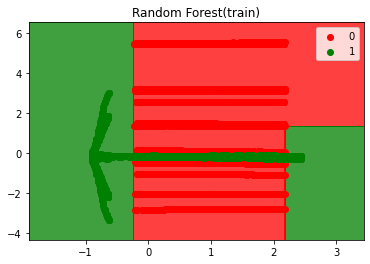

In [ ]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01), np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
#print(knn.predict(np.array([x1.ravel(),x2.ravel()]).T).shape,x1.shape,knn.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape).shape)
plt.contourf(x1,x2,rf.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha=0.75 ,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c=ListedColormap(('red','green'))(i),label = j)
plt.title("Random Forest(train)")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


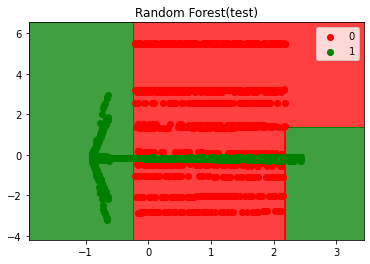

In [ ]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01), np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
#print(knn.predict(np.array([x1.ravel(),x2.ravel()]).T).shape,x1.shape,knn.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape).shape)
plt.contourf(x1,x2,rf.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha=0.75 ,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c=ListedColormap(('red','green'))(i),label = j)
plt.title("Random Forest(test)")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.show()

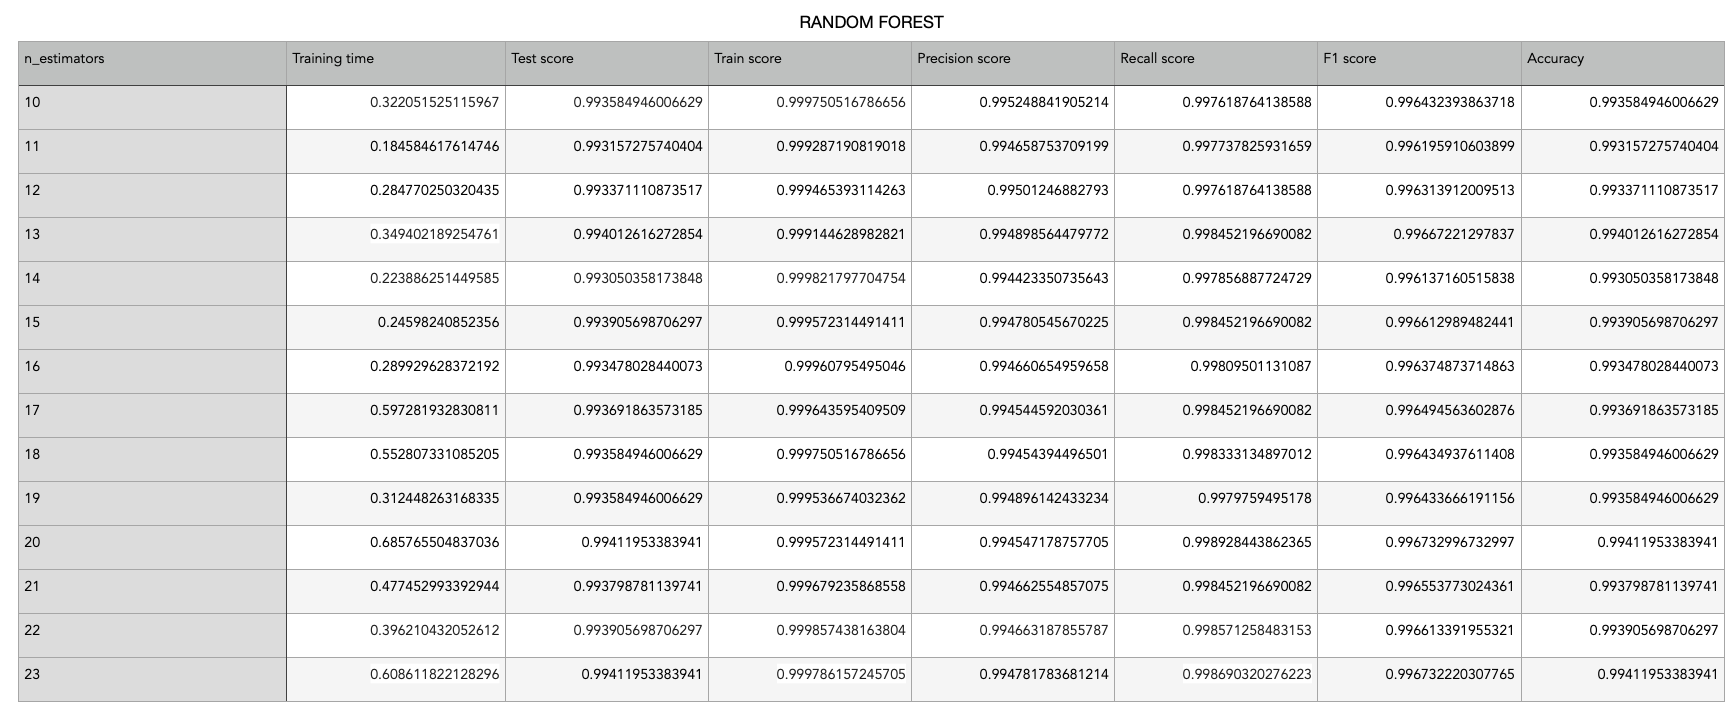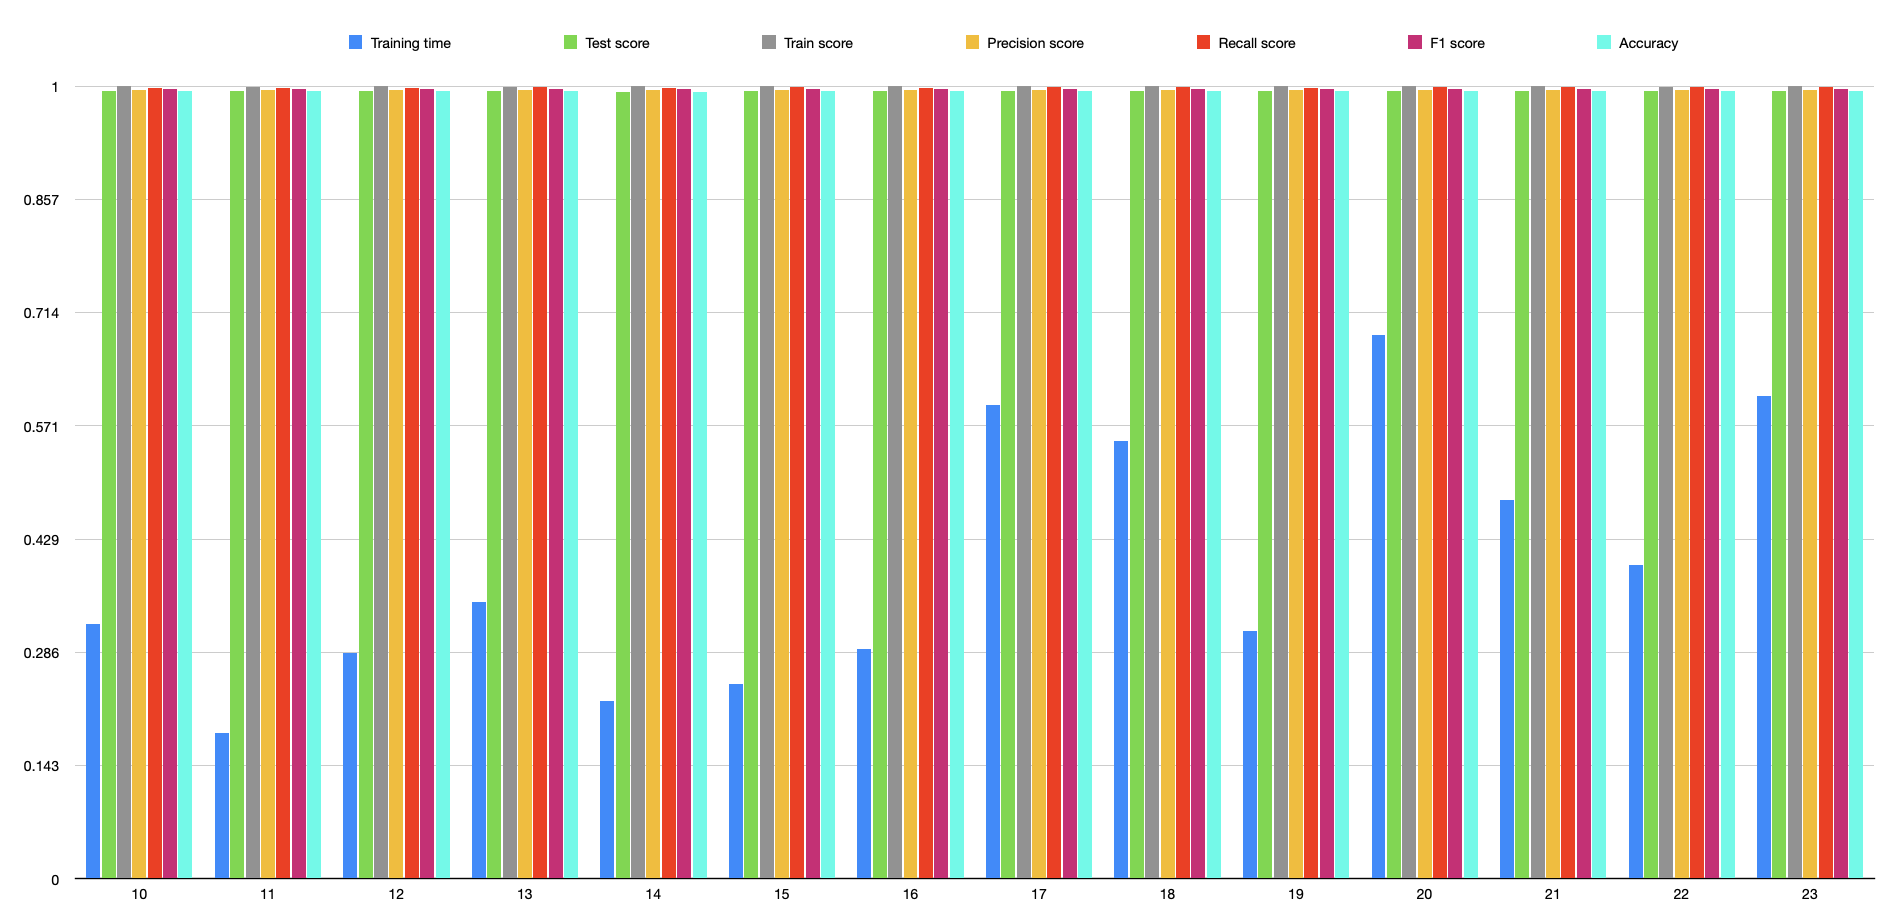

In [ ]:
#K- nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train,y_train)
start_time = time.time()
knn.fit(x_train, y_train)
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.014896392822265625


In [ ]:
start_time=time.time()
y_knn=knn.predict(x_test)
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.2662675380706787


In [ ]:
print(knn.score(x_test,y_test))

0.9945472041056346


In [ ]:
print(cm(y_test,y_knn))

[[ 903   51]
 [   0 8399]]


In [ ]:
print(f1_score(y_test, y_knn))

0.9969731141314024


In [ ]:
print(recall_score(y_test, y_knn))

1.0


In [ ]:
print(precision_score(y_test, y_knn))

0.9939644970414201


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       954
           1       0.99      1.00      1.00      8399

    accuracy                           0.99      9353
   macro avg       1.00      0.97      0.98      9353
weighted avg       0.99      0.99      0.99      9353



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


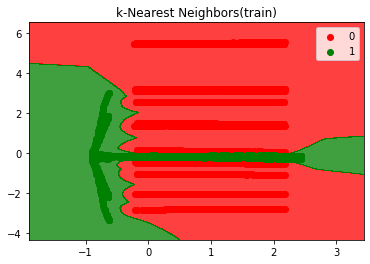

In [ ]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01), np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
#print(knn.predict(np.array([x1.ravel(),x2.ravel()]).T).shape,x1.shape,knn.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape).shape)
plt.contourf(x1,x2,knn.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha=0.75 ,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c=ListedColormap(('red','green'))(i),label = j)
plt.title("k-Nearest Neighbors(train)")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


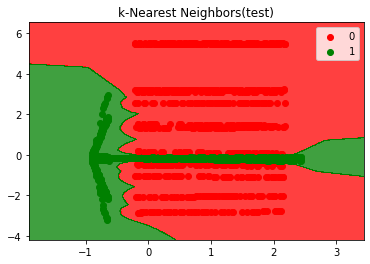

In [ ]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01), np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
#print(knn.predict(np.array([x1.ravel(),x2.ravel()]).T).shape,x1.shape,knn.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape).shape)
plt.contourf(x1,x2,knn.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha=0.75 ,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c=ListedColormap(('red','green'))(i),label = j)
plt.title("k-Nearest Neighbors(test)")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.show()

KNN model with n-neighbors 5, metric minkowski and p (power factor) 2 has been selected since the accuracy and f1 score were the maximum at these parameters and the time of execution was very low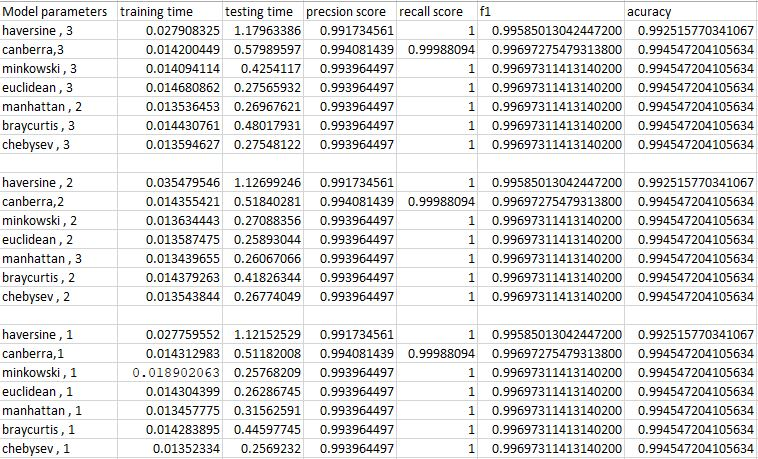

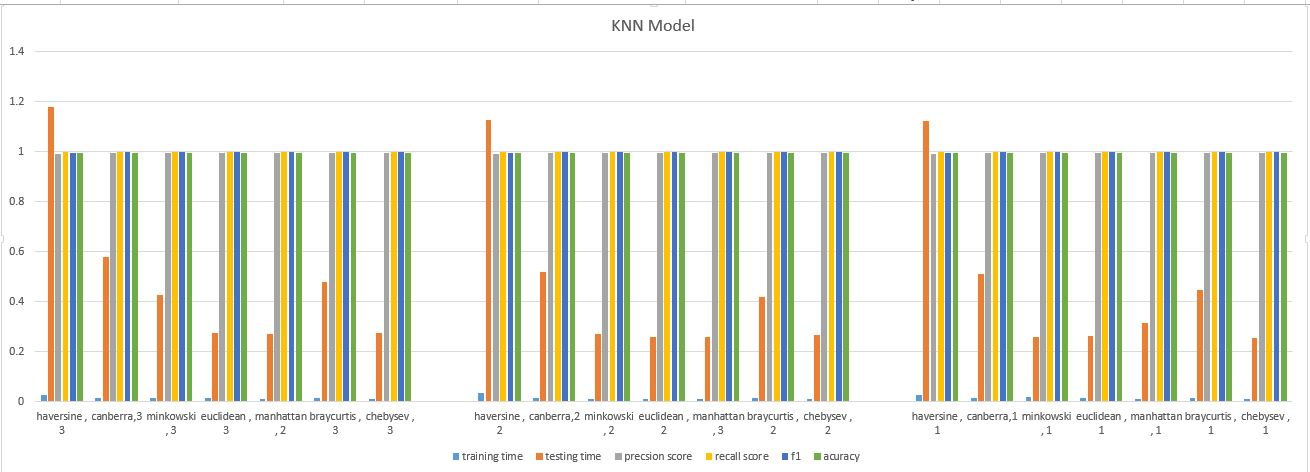

In [ ]:
# Decision Tree with entropy
from sklearn.tree import DecisionTreeClassifier
  
dt = DecisionTreeClassifier(criterion ="entropy", max_depth = 5)
start_time = time.time()
dt.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.03068065643310547


In [ ]:
y_test_pred = dt.predict(x_test)

In [ ]:
print("Train score is:", dt.score(x_train, y_train))
print("Test score is:", dt.score(x_test, y_test))

Train score is: 0.9934421555349633
Test score is: 0.9944402865390783


In [ ]:
print(cm(y_test,y_test_pred))

[[ 902   52]
 [   0 8399]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       954
           1       0.99      1.00      1.00      8399

    accuracy                           0.99      9353
   macro avg       1.00      0.97      0.98      9353
weighted avg       0.99      0.99      0.99      9353



In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_test_pred))

0.9938468820257957


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_test_pred))

1.0


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_test_pred))

0.9969139465875371


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))

0.9944402865390783


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


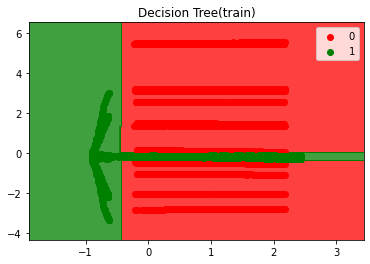

In [ ]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01), np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,dt.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha=0.75 ,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c=ListedColormap(('red','green'))(i),label = j)
plt.title("Decision Tree(train)")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


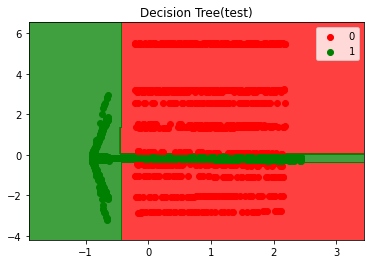

In [ ]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01), np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,dt.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha=0.75 ,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c=ListedColormap(('red','green'))(i),label = j)
plt.title("Decision Tree(test)")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.show()

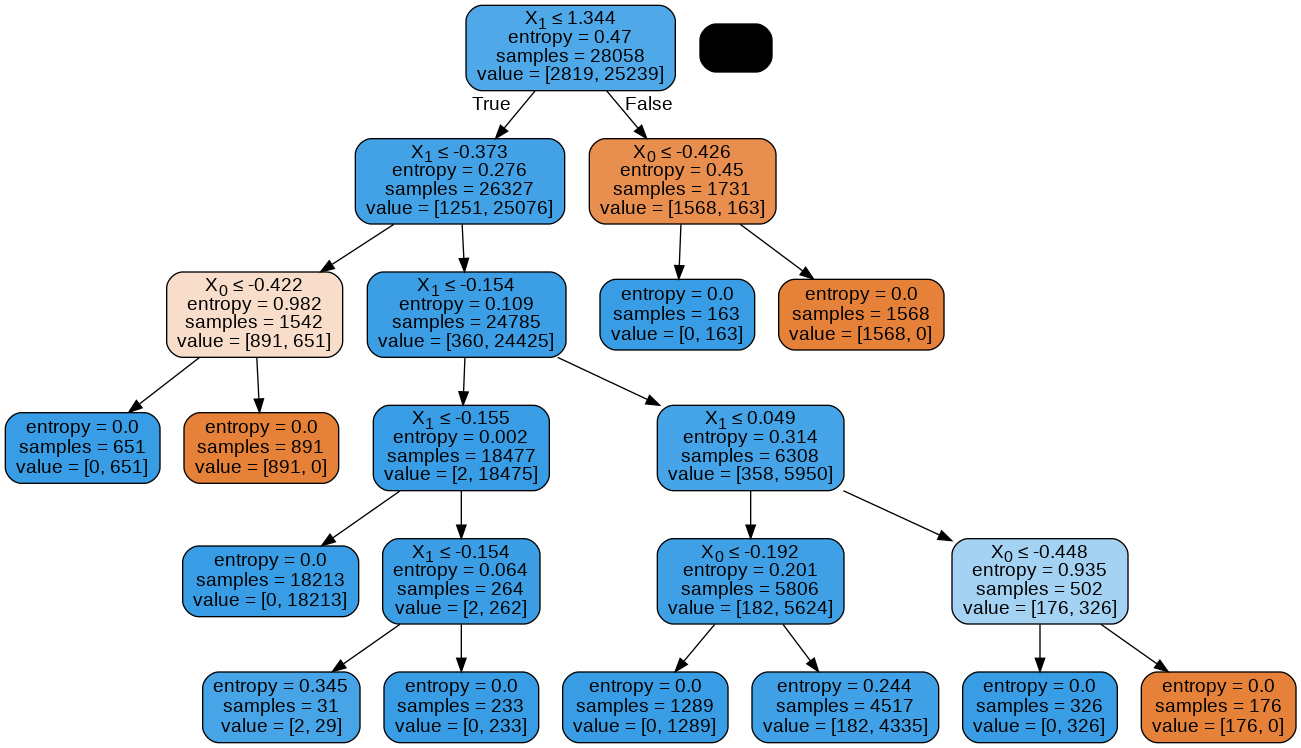

In [ ]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

FOR DECISION TREE USING THE CRITERIA ENTROPY, WE HAVE TAKEN THE VALUE OF MAX DEPTH AS 5, TO ENSURE THE MAXIMUM ACCURACY AND F1 SCORE, BUT ALSO PREVENT OVERFITTING.

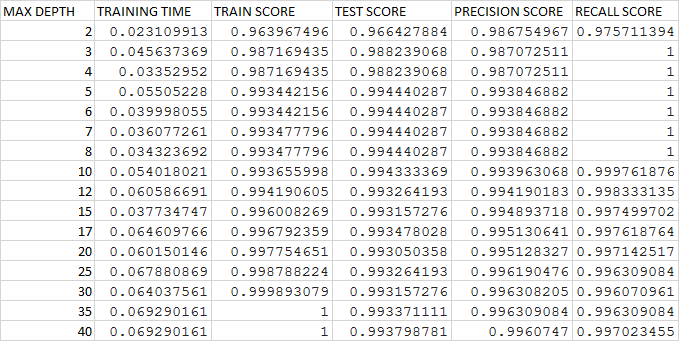

In [ ]:
# Decision tree using gini
from sklearn.tree import DecisionTreeClassifier
  
dt = DecisionTreeClassifier(criterion ="gini", max_depth = 5)
start_time = time.time()
dt.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.05782175064086914


In [ ]:
y_test_pred = dt.predict(x_test)

In [ ]:
print("Train score is:", dt.score(x_train, y_train))
print("Test score is:", dt.score(x_test, y_test))

Train score is: 0.9934421555349633
Test score is: 0.9944402865390783


In [ ]:
print(cm(y_test,y_test_pred))

[[ 902   52]
 [   0 8399]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       954
           1       0.99      1.00      1.00      8399

    accuracy                           0.99      9353
   macro avg       1.00      0.97      0.98      9353
weighted avg       0.99      0.99      0.99      9353



In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_test_pred))

0.9938468820257957


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_test_pred))

1.0


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))

0.9944402865390783


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_test_pred))

0.9969139465875371


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


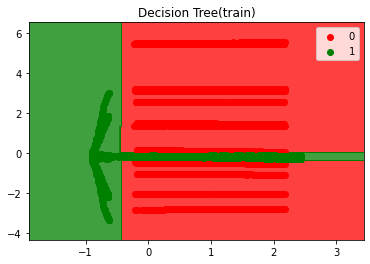

In [ ]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01), np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,dt.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha=0.75 ,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c=ListedColormap(('red','green'))(i),label = j)
plt.title("Decision Tree(train)")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


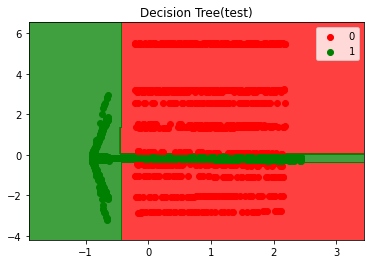

In [ ]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01), np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,dt.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha=0.75 ,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c=ListedColormap(('red','green'))(i),label = j)
plt.title("Decision Tree(test)")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.show()

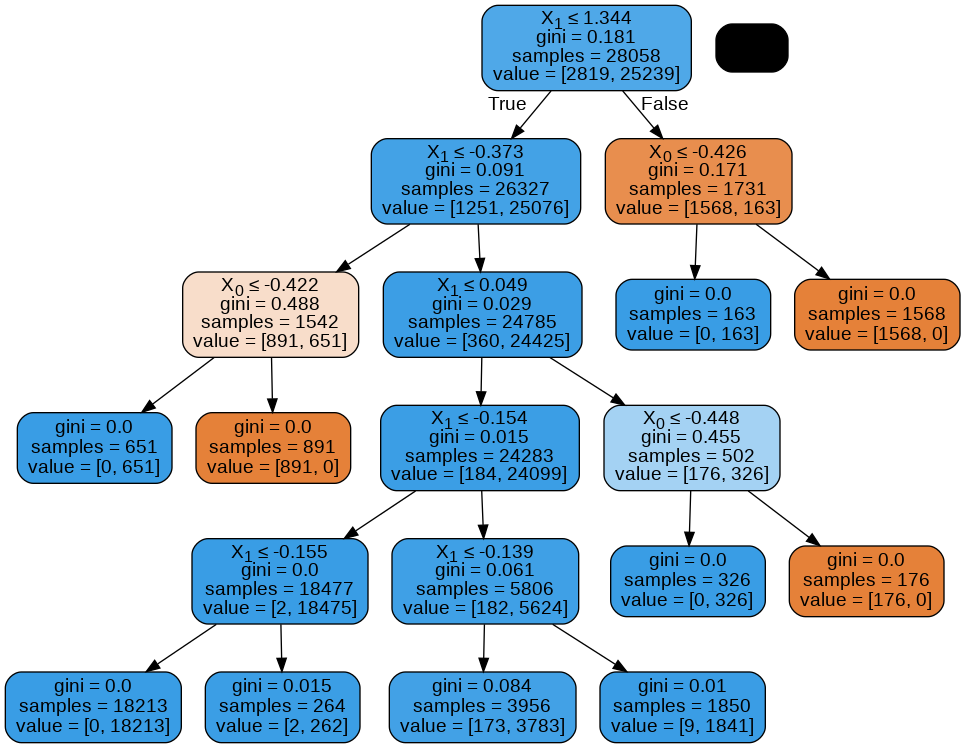

In [ ]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

FOR DECISION TREE USING THE CRITERIA GINI, WE HAVE TAKEN THE VALUE OF MAX DEPTH AS 5, TO ENSURE THE MAXIMUM ACCURACY AND F1 SCORE, BUT ALSO PREVENT OVERFITTING.

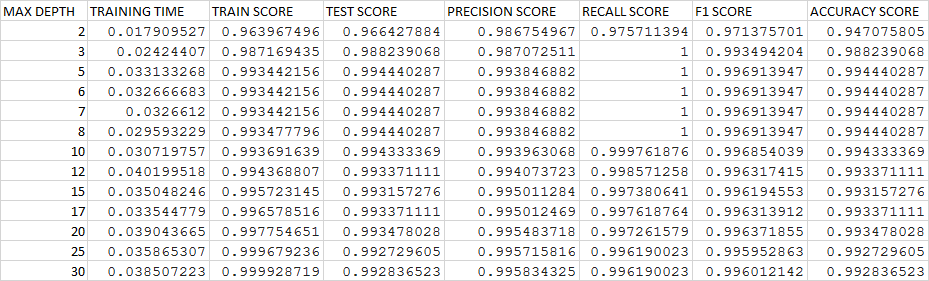

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000)
start_time = time.time()
lr.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.07203483581542969


In [ ]:
start_time = time.time()
y_test_pred = lr.predict(x_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.006354570388793945


In [ ]:
print("Train score is:", lr.score(x_train, y_train))
print("Test score is:", lr.score(x_test, y_test))

Train score is: 0.9445434457195808
Test score is: 0.9470758045546883


In [ ]:
print(cm(y_test,y_test_pred))

[[ 459  495]
 [   0 8399]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.48      0.65       954
           1       0.94      1.00      0.97      8399

    accuracy                           0.95      9353
   macro avg       0.97      0.74      0.81      9353
weighted avg       0.95      0.95      0.94      9353



In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_test_pred))

0.944344501911401


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_test_pred))

1.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


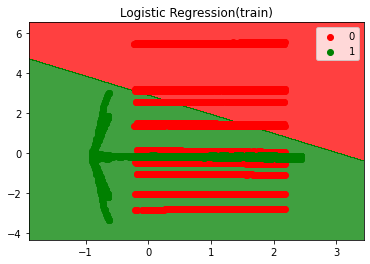

In [ ]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01), np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,lr.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha=0.75 ,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c=ListedColormap(('red','green'))(i),label = j)
plt.title("Logistic Regression(train)")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


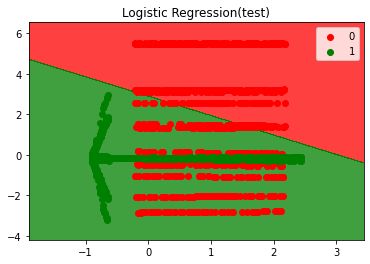

In [ ]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01), np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,lr.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha=0.75 ,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c=ListedColormap(('red','green'))(i),label = j)
plt.title("Logistic Regression(test)")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.show()